<a href="https://colab.research.google.com/github/PaulaDiz/C-LCULO-NUM-RICO-II/blob/main/RK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      t   y (RK4)  y (Exacta)  Error Absoluto
0   0.0  0.500000    0.500000        0.000000
1   0.2  0.829293    0.829299        0.000005
2   0.4  1.214076    1.214088        0.000011
3   0.6  1.648922    1.648941        0.000019
4   0.8  2.127203    2.127230        0.000027
5   1.0  2.640823    2.640859        0.000036
6   1.2  3.179894    3.179942        0.000047
7   1.4  3.732340    3.732400        0.000060
8   1.6  4.283409    4.283484        0.000074
9   1.8  4.815086    4.815176        0.000091
10  2.0  5.305363    5.305472        0.000109
11  2.2  5.727364    5.727493        0.000130


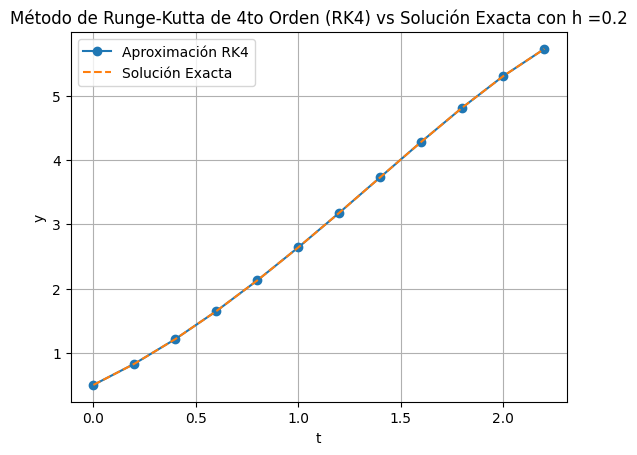

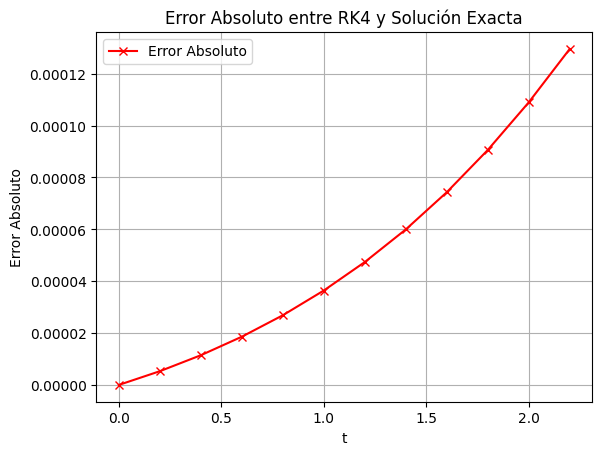

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Definir la ecuación diferencial y' = y - t^2 + 1
def f(t, y):
  return y - t**2 + 1

# Solución exacta de la ecuación diferencial
def exact_solution(t):
  return t**2 + 2*t + 1 - 0.5*np.exp(t)

# Método de Runge-Kutta de cuarto orden (RK4)
def runge_kutta_4(f, t0, y0, h, t_end):
  # Inicialización de variables
  t_vals = [t0]
  y_vals = [y0]
  t = t0
  y = y0
  # Iteración para resolver hasta t_end
  while t < t_end:
    # Cálculo de los k1, k2, k3 y k4
    k1 = f(t, y)
    k2 = f(t + h/2, y + h/2 * k1)
    k3 = f(t + h/2, y + h/2 * k2)
    k4 = f(t + h, y + h * k3)
    # Actualización de y
    y = y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    t = t + h
    # Guardar los valores
    t_vals.append(t)
    y_vals.append(y)
  return t_vals, y_vals


# Parámetros iniciales
t0 = 0 # Valor inicial de t
y0 = 0.5 # Valor inicial de y
t_end = 2 # Valor final de t
h = 0.2 # Tamaño de paso
# Llamar al método de Runge-Kutta de orden 4
t_vals, y_vals = runge_kutta_4(f, t0, y0, h, t_end)
# Calcular la solución exacta para los mismos valores de t
exact_vals = [exact_solution(t) for t in t_vals]
# Calcular el error absoluto en cada punto
errors = [abs(exact_vals[i] - y_vals[i]) for i in range(len(t_vals))]
# Mostrar la tabla de resultados con los errores en un DataFrame
tabla_resultados = pd.DataFrame({
't': t_vals,
'y (RK4)': y_vals,
'y (Exacta)': exact_vals,
'Error Absoluto': errors
})
print(tabla_resultados)
# Graficar los resultados
plt.plot(t_vals, y_vals, label="Aproximación RK4", marker='o')
plt.plot(t_vals, exact_vals, label="Solución Exacta", linestyle='--')
plt.xlabel("t")
plt.ylabel("y")
plt.title(f"Método de Runge-Kutta de 4to Orden (RK4) vs Solución Exacta con h ={h}")
plt.legend()
plt.grid(True)
plt.show()
# Graficar los errores
plt.plot(t_vals, errors, label="Error Absoluto", marker='x', color='r')
plt.xlabel("t")
plt.ylabel("Error Absoluto")
plt.title("Error Absoluto entre RK4 y Solución Exacta")
plt.legend()
plt.grid(True)
plt.show()